In [1]:
#Import packages
import pandas as pd
from sklearn.feature_extraction import FeatureHasher
from functools import reduce
import numpy as np

### Load Raw Data

In [125]:
#Load data and convert user id to numeric
df = pd.read_csv('fd-export.csv', low_memory=False)
df['user_id'] = df['user_id'].astype('category')
df['user_id'] = df['user_id'].cat.codes


In [148]:
df['trackable_type'].unique()

array(['Condition', 'Symptom', 'Weather', 'Treatment', 'Tag', 'Food',
       'HBI'], dtype=object)

### Extract information

In [172]:
#Extract symptoms
df2 = df.loc[df['trackable_type'] == 'Symptom']
#Filter most commonly reported symptoms in dataset
df_symptoms = df2.groupby("trackable_name").filter(lambda x: len(x) > 1999)

df_symptoms['trackable_value'] = df_symptoms['trackable_value'].astype('int16')

y = df_symptoms.pivot_table(index='user_id', columns='trackable_name', values='trackable_value')
df_symptom = df_symptoms.join(y).drop(['trackable_id', 'trackable_type', 'trackable_value', 'trackable_name'], axis=1)
df_symptom = df_symptom.fillna(0)
df_grouped = df_symptom.groupby(['user_id', 'checkin_date'])[
 'Abdominal pain',
 'Anxiety',
 'Back pain',
 'Bloating',
 'Brain fog',
 'Chest pain',
 'Chronic pain',
 'Constipation',
 'Depression',
 'Diarrhea',
 'Difficulty concentrating',
 'Dizziness',
 'Dull',
 'Fatigue',
 'Fatigue and tiredness',
 'Foot pain',
 'Hand pain',
 'Headache',
 'Hip pain',
 'Insomnia',
 'Irritability',
 'Joint pain',
 'Knee pain',
 'Leg pain',
 'Lower Back Pain',
 'Migraine',
 'Muscle pain',
 'Nausea',
 'Neck pain',
 'Shortness of breath',
 'Shoulder pain',
 'Sore throat',
 'Stomach Pain',
 'Stomach cramps',
 'Vomiting',
 'Weakness',
 'Wrist pain'].apply(lambda x : x.astype(int).sum())
#df_symptom['all']=df_symptom.iloc[:,5:-1].sum(axis=1)
#df_symptom.drop(df_symptom.columns[5:-1], axis=1, inplace=True)
df_grouped.head(1)

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,,Abdominal pain,Anxiety,Back pain,Bloating,Brain fog,Chest pain,Chronic pain,Constipation,Depression,Diarrhea,...,Nausea,Neck pain,Shortness of breath,Shoulder pain,Sore throat,Stomach Pain,Stomach cramps,Vomiting,Weakness,Wrist pain
user_id,checkin_date,,,,,,,,,,,,,,,,,,,,,
0,2/15/17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df_grouped.checkin_date = pd.to_datetime(df_grouped.iloc[1])

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [25]:
#Extract treatments
df3 = df.loc[df['trackable_type'] == 'Treatment']
df4 = df3[(df3.trackable_name != 'Exercise') & (df3.trackable_name != 'Yoga') & (df3.trackable_name != 'Sleep') & (df3.trackable_name != 'Meditation')]

#Filter most commonly reported treatments in dataset
df_treatments = df4.groupby("trackable_name").filter(lambda x: len(x) > 99)
df_treatments = df_treatments.drop(['trackable_id', 'trackable_type', 'trackable_value'], axis=1)
df_treatments = df_treatments.rename(index=str, columns={"trackable_name": "treatment"})
df_treatments.shape

(67909, 6)

In [26]:
#Extract food
df2 = df.loc[df['trackable_type'] == 'Food']
#Filter most commonly reported food in dataset
df_food = df2.groupby("trackable_name").filter(lambda x: len(x) > 499).drop(['trackable_id', 'trackable_type', 'trackable_value'], axis=1)
df_food = df_food.rename(index=str, columns={"trackable_name": "food"})
df_food.shape

(11838, 6)

In [27]:
#Extract lifestyle tags
df4 = df.loc[df['trackable_type'] == 'Tag']
#Filter most commonly reported tags in dataset
df_tag = df4.groupby("trackable_id").filter(lambda x: len(x) > 999).drop(['trackable_id', 'trackable_type', 'trackable_value'], axis=1)
#Rename column
df_tag = df_tag.rename(index=str, columns={"trackable_name": "lifestyle"})
df_tag.shape

(30457, 6)

In [174]:
#Extract conditions
df5 = df.loc[df['trackable_type'] == 'Condition']
#Filter most commonly reported symptoms in dataset
df_condition = df5.groupby("trackable_id").filter(lambda x: len(x) > 999)

df_condition['trackable_value'] = df_condition['trackable_value'].astype('int16')

y = df_condition.pivot_table(index='user_id', columns='trackable_name', values='trackable_value')
df_conditions = df_condition.join(y).drop(['trackable_id', 'trackable_type', 'trackable_value', 'trackable_name'], axis=1)

df_conditions.head(2)
#df_symptom = df_symptom.fillna(0)
#df_grouped = df_symptom.groupby(['user_id', 'checkin_date'])[
# 'Abdominal pain',
# 'Wrist pain'].apply(lambda x : x.astype(int).sum())
#df_symptom['all']=df_symptom.iloc[:,5:-1].sum(axis=1)
#df_symptom.drop(df_symptom.columns[5:-1], axis=1, inplace=True)
#df_grouped.head(1)

#y = df_condition.reset_index().pivot_table(index='user_id', columns='trackable_name', values='trackable_value')
#df_conditions = df_condition.join(y).drop(['trackable_id', 'trackable_type', 'trackable_name', 'trackable_value'], axis=1)
#df_conditions['all'] = df_conditions.iloc[:,5:-1].sum(axis=1)
#df_conditions.drop(df_conditions.columns[5:-1], axis=1, inplace=True)
#df_conditions.shape

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,age,sex,country,checkin_date,Allergies,Anxiety,Arthritis,Asthma,Back pain,...,Insomnia,Irritable bowel syndrome,Lupus,Lyme disease,Migraine,POTS,Postural Orthostatic Tachycardia Syndrome,Rheumatoid arthritis,Ulcerative colitis,joint pain
0,2365,NaN,NaN,NaN,11/26/15,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,5859,31.0,male,US,11/26/15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0


In [362]:
df_conditions

In [32]:
dfs = [df_tag, df_food, df_treatments]
df_merge1 = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'checkin_date']), dfs)
df_merge1 = df_merge1.drop(['age_x', 'sex_x', 'country_x','age_y', 'sex_y', 'country_y'], axis=1)
df_merge1.shape

(18765, 8)

In [119]:
dft = [df_merge1, df_conditions, df_symptom]
df_final = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'checkin_date']), dft)
df_final1 = df_final.drop(['age_x', 'sex_x', 'country_x','age_y', 'sex_y', 'country_y'], axis=1)
df_final1.shape

(209878, 10)

In [123]:
dedup = df_final1.drop_duplicates()

,user_id,checkin_date,lifestyle,food,treatment,all_x,age,sex,country,all_y
0,1305,3/16/17,tired,coffee,Cymbalta,0.0,48.0,female,US,0.000000
1,1305,3/16/17,tired,coffee,Cymbalta,0.0,48.0,female,US,3.000000
2,1305,3/16/17,tired,coffee,Cymbalta,0.0,48.0,female,US,10.000000
3,880,7/31/17,tired,pizza,Tramadol,7.0,37.0,female,BE,12.333333
4,880,7/31/17,tired,pizza,Tramadol,7.0,37.0,female,BE,13.000000


In [124]:
dedup.to_csv('dedup.csv', sep=',')

In [102]:
df_final1.checkin_date = pd.to_datetime(df_final1.checkin_date)

In [ ]:
dataframe = df_final1.set_index('checkin_date')
dataframe.drop_duplicates()
dataframe = dataframe.fillna(0)
dataframe.sort_values(by=['user_id', 'checkin_date'])

In [112]:
dataframe.to_csv('time.csv', sep=',')

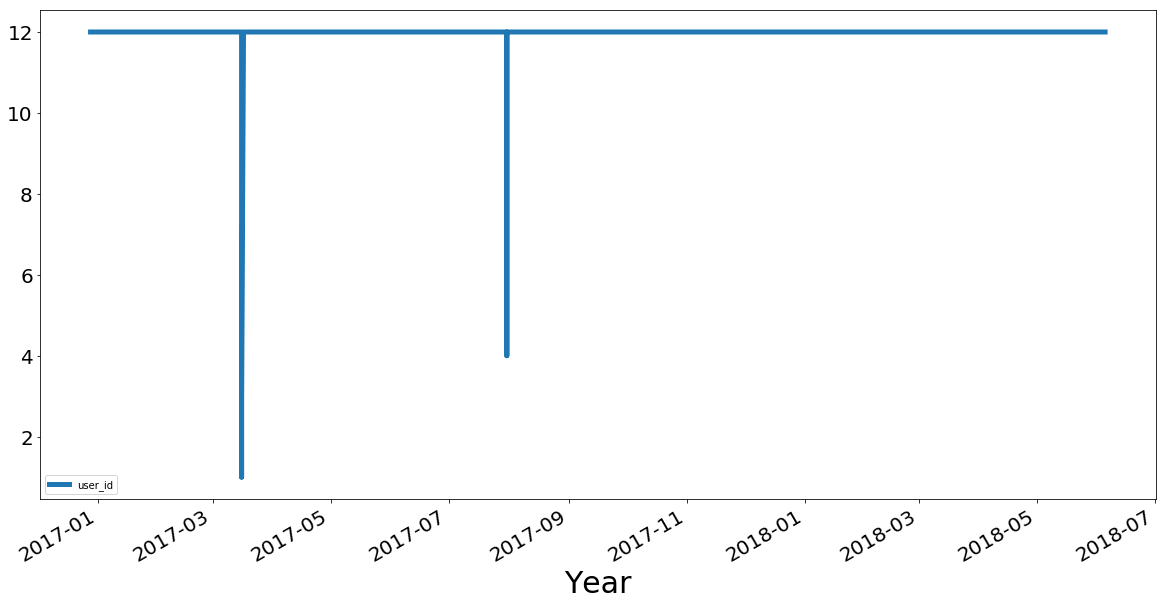

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
x = dataframe.fillna(0)

anxiety = dataframe[['user_id']] 
anxiety.rolling(12).count().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=30);

In [282]:
df5 = df.loc[df['trackable_type'] == 'Condition']

In [285]:
df_condition = df5.groupby("trackable_id").filter(lambda x: len(x) > 999)

In [257]:
df4 = df.loc[df['trackable_type'] == 'Tag']

In [273]:
df_tag = df4.groupby("trackable_id").filter(lambda x: len(x) > 149)

In [201]:
'''
#Get doses of medications entered
result = df_treatments['trackable_value'].str.split('(\d+(\.\d)) ([A-z]+)', expand=True)
result = result.loc[:,[1,2]]
result.rename(columns={1:'x', 2:'y'}, inplace=True)
df_treatments = df_treatments.join(result).drop(['trackable_value'], axis=1)
df_treatments['x'] = df_treatments['x'].astype('float')
y = df_treatments.reset_index().pivot_table(index='user_id', columns='trackable_name', values='x')
df_treatment = df_treatments.join(y).drop(['trackable_id', 'trackable_type', 'trackable_name', 'x', 'y'], axis=1)
'''

In [ ]:
df_treatment = pd.concat([df_treatments, df_treatments_hash], ignore_index=True)
df_treatment.head(5)

In [39]:
#b = DataFrame(a.var1.str.split(',').tolist(), index=a.var2).stack()
#b = b.reset_index()[[0, 'var2']] # var1 variable is currently labeled 0
#b.columns = ['var1', 'var2'] # renaming var1
b = pd.DataFrame(df_treatments.trackable_value.str.split(' ').tolist(), index=df_treatments.user_id).stack()
b = b.reset_index()[[0, 'user_id']]
b.columns = ['var1', 'var2']

#z = df_treatments.reset_index().pivot_table(index='user_id', columns='trackable_name', values='trackable_value')
#df_treatments = df_treatments.join(z).drop(['trackable_id', 'trackable_type', 'trackable_name', 'trackable_value'], axis=1)